<a href="https://colab.research.google.com/github/NagaSukanyaK/Netflix/blob/main/NetflixCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/netflix_titles_nov_2019.csv')
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [3]:
df.isnull().sum()

# Fill or drop
df['director'].fillna('Unknown', inplace=True)
df.dropna(subset=['date_added'], inplace=True)

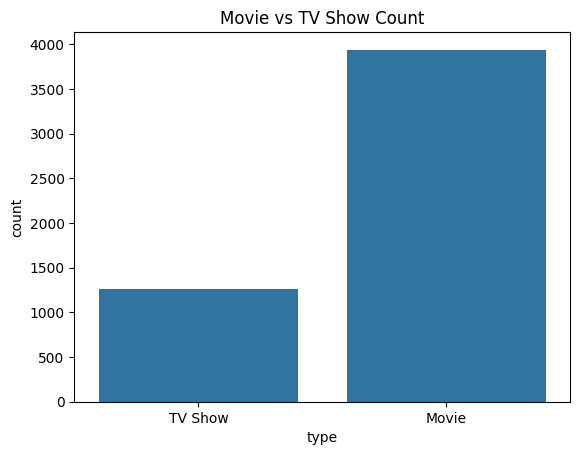

In [4]:
# Content type distribution
sns.countplot(data=df, x='type')
plt.title('Movie vs TV Show Count')
plt.show()

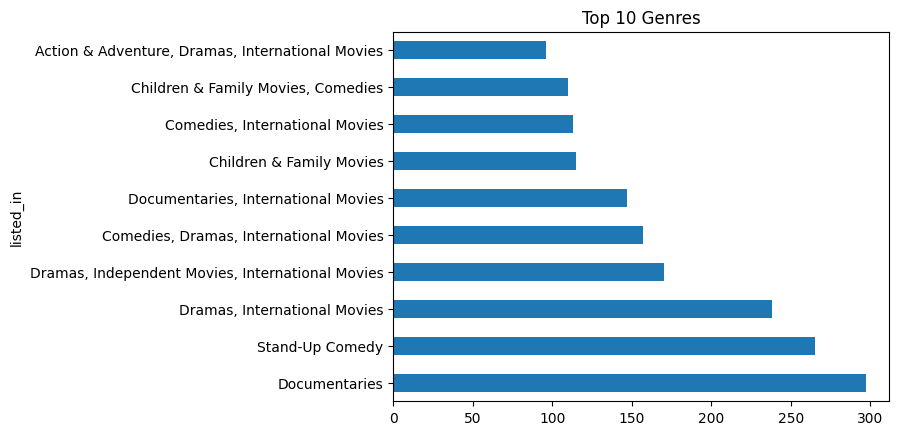

In [5]:
df['listed_in'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Genres')
plt.show()

In [6]:
df['year_added'] = pd.to_datetime(df['date_added']).dt.year
df['month_added'] = pd.to_datetime(df['date_added']).dt.month
df['country'] = df['country'].fillna('Unknown')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = pd.get_dummies(df[['rating', 'country', 'release_year']], drop_first=True)
y = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8238691049085659


In [8]:
import joblib
joblib.dump(model, 'netflix_model.pkl')

['netflix_model.pkl']

In [9]:
# Replace with your GitHub username and email
!git config --global user.name "NagaSukanyaK"
!git config --global user.email "nagasukanya494@gmail.com"


In [10]:
from getpass import getpass
token = getpass('Enter your GitHub token: ')

repo_url = "https://NagaSukanyaK:" + token + "@github.com/NagaSukanyaK/Netflix.git"

!git clone {repo_url}


Enter your GitHub token: ··········
Cloning into 'Netflix'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 892.60 KiB | 14.40 MiB/s, done.
